# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
import nlpaug.augmenter.word as naw
import contractions
from wordcloud import WordCloud
from collections import Counter

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jiamingchu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jiamingchu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jiamingchu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/jiamingchu/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [2]:
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import time
#from xgboost import XGBClassifier
#from xgboost import plot_importance
import scikitplot as skplt

# Import Dataset

In [8]:
def process_csv(csv_data):
    # process csv data
    df_source = f"./data/{csv_data}"
    sample_data = pd.read_csv(df_source, skiprows=1)
    df = pd.DataFrame(sample_data)
    # print(df.head())
    return 
# convert xlsx to csv format
def excel_to_csv(excel_data):
    xlsx_source = f"./data/{excel_data}"
    csv_source = xlsx_source.replace(".xlsx", ".csv")
    read_file = pd.read_excel(xlsx_source)
    read_file.to_csv(csv_source,index=None, header=True)
    


if __name__ == '__main__':
    cwd = os.getcwd()
    path = os.path.join(cwd, "data")
    data = os.listdir(path)
    excel_data = list(filter(lambda f: f.endswith('.xlsx'), data))
    csv_data = list(filter(lambda f: f.endswith('.csv'), data))
    # convert gui data from excel to csv
    print(excel_data)
    excel_to_csv(excel_data[0])
    # args = sys.argv[1:]
    # python process_csv.py <arguments>
    # argument should be the path to the csv,
    process_csv(csv_data[0])

['pseudo_data.xlsx']


In [39]:
test_col = ['Test Lead', 
            'Why defect was not identifierd during testing?', 
            'Are related requirements recorded in the BR or UCS?',
            'If prior response is \"Yes\", list down the BR or UCS document number(s) and clause identifier(s)',
            'Primary Root Cause Classification #3',
            'Remark',
            'Proposed solution to prevent recurrence']

BS39_data = pd.read_excel("./data/BS39_data.xlsx", skiprows=1)
df = pd.DataFrame(BS39_data, columns=test_col)
df

,Test Lead,Why defect was not identifierd during testing?,Are related requirements recorded in the BR or UCS?,"If prior response is ""Yes"", list down the BR or UCS document number(s) and clause identifier(s)",Primary Root Cause Classification #3,Remark,Proposed solution to prevent recurrence
0,RS138 Test Lead - Jessie Chua\nBS39 Test Lead ...,Test cases was not chosen in all tiers for con...,No,NaN,RS138 & BS39\nThe impact was documented in RS1...,NaN,More extensive testing required to uncover com...
1,Esther Ong,Test cases was not chosen based on the impact ...,No,NaN,Missing Test Case,NaN,Need to consider boundary conditions when deve...
2,Esther Ong,Test cases was not chosen based on the impact ...,Y,fp17001-epd-dd-004-abt-ticket_services_impleme...,Missing Test Case,NaN,review of test case created by developer and u...
3,Esther Ong,Issue not observed in Test Lab.,No,NaN,Test & Production Environment Difference,NaN,design guideline and coding practice to update...
4,Esther Ong,Issue not observed in Test Lab.,No,NaN,Test & Production Operation Difference,Ganga Prasad is no longer with FS,Fix has been delivered in BS40.\n\nUpdated dep...
5,Esther Ong,Issue not observed in Test Lab.,No,NaN,Test & Production Environment Difference,Insource has resigned,1. Detailed analysis\n2. Peer Review of the co...
6,Esther Ong,Issue not observed in Test Lab.,No,NaN,Test & Production Operation Difference,Ganga Prasad is no longer with FS,Fix has been delivered in BS39P2.\n\nAutomated...
7,NaN,Issue not observed in Test Lab.,Issue 1\nPGCT not receiving the blacklist from...,No,Test & Production Environment Difference,NaN,NaN
8,"when upgrade device application, ensure that t...",Test case not performed,Unexpected scenario case which is not handle b...,No,Missing Test Case,MSI,NaN
9,Esther Ong,Test cases was not chosen based on the impact ...,No,NaN,DR can only performed in TL device. Need TL an...,NaN,get more understanding of the api before using


# EDA

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 7 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Test Lead                                                                                        18 non-null     object
 1   Why defect was not identifierd during testing?                                                   19 non-null     object
 2   Are related requirements recorded in the BR or UCS?                                              18 non-null     object
 3   If prior response is "Yes", list down the BR or UCS document number(s) and clause identifier(s)  3 non-null      object
 4   Primary Root Cause Classification #3                                                             19 non-null     object
 5   Remark            

Issue not observed in Test Lab.                       9
Test cases was not chosen based on the impact anal    5
Test cases was not chosen in all tiers for concess    1
Test case not performed                               1
Test case not executed                                1
Test case performed and defect observed but missed    1
Test case was chosen only for certain ticket types    1
Name: Why defect was not identifierd during testing?, dtype: int64


<AxesSubplot:>

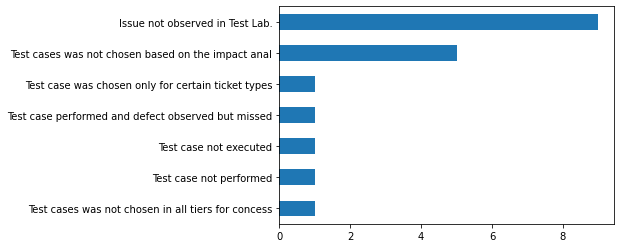

In [52]:
reasons = df['Why defect was not identifierd during testing?']
reasons = reasons.apply(lambda x: x[:50])
print(reasons.value_counts())
reasons.value_counts().sort_values().plot(kind='barh', )

Test & Production Environment Difference     8
Missing Test Case                            4
Test & Production Operation Difference       3
RS138 & BS39\nThe impact was documented i    1
DR can only performed in TL device. Need     1
Missed raising the defect in ialm system     1
Root Cause for missing test case\nAs full    1
Name: Primary Root Cause Classification #3, dtype: int64


<AxesSubplot:>

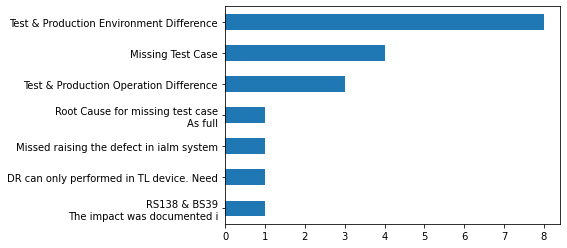

In [16]:
root_causes = df['Primary Root Cause Classification #3']
root_causes = root_causes.apply(lambda x: x[:40])
print(root_causes.value_counts())
root_causes.value_counts().sort_values().plot(kind='barh', )

It appears that the largest reason why the defect happened is due to Test and Production Environment Difference, followed by Missing Test Case.

# Data Cleaning

New column "uncaught reasons" -- Why defect was not identified during testing

We want to identify the keywords from this column that can allow us to pinpoint the underlying root cause.
Example:

Tester input: use case was not documented, so the feature is unknown to the testers, so they didn’t design with it in mind.

map above to:

Root cause: ‘Missing requirement’

To do this, we first have to clean the text in the column to ensure that the keywords are as similar as possible (to ensure highest chance of mapping correctly).

In [29]:
df['uncaught_reasons'] = df['Why defect was not identifierd during testing?']
df['uncaught_reasons'].head()

0    Test cases was not chosen in all tiers for con...
1    Test cases was not chosen based on the impact ...
2    Test cases was not chosen based on the impact ...
3                      Issue not observed in Test Lab.
4                      Issue not observed in Test Lab.
Name: uncaught_reasons, dtype: object

In [3]:
def get_pos(tag):
    if tag[0] == 'N':
        return wordnet.NOUN
    elif tag[0] == 'V':
        return wordnet.VERB
    elif tag[0] == 'R':
        return wordnet.ADV
    elif tag[0] == 'J':
        return wordnet.ADJ
    return wordnet.NOUN

def processText(sentence):
    #tokenize
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+')
    tokens = tokenizer.tokenize(sentence.lower())

    # fix contractions
    fixed_tokens = [contractions.fix(word) for word in tokens]

    #remove stopwords
    useful_words = [word for word in fixed_tokens if word not in stopwords.words('english')]

    #pos tagging
    pos_tuple = pos_tag(useful_words)
    
    #lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(tup[0], get_pos(tup[1])) for ind, tup in enumerate(pos_tuple)]

    clean_text = ""
    for lem_word in lemmatized_tokens:
        clean_text += str(lem_word) + " "
        
    return clean_text

In [40]:
df['Processed Text'] = df['Why defect was not identifierd during testing?'].apply(lambda x: processText(x))
df['Processed Text'] 

0     [test, case, choose, tier, concession, period,...
1          [test, case, choose, base, impact, analysis]
2          [test, case, choose, base, impact, analysis]
3                           [issue, observe, test, lab]
4                           [issue, observe, test, lab]
5                           [issue, observe, test, lab]
6                           [issue, observe, test, lab]
7                           [issue, observe, test, lab]
8                                 [test, case, perform]
9          [test, case, choose, base, impact, analysis]
10         [test, case, choose, base, impact, analysis]
11                                [test, case, execute]
12    [test, case, perform, defect, observe, missed,...
13         [test, case, choose, base, impact, analysis]
14                          [issue, observe, test, lab]
15    [test, case, choose, certain, ticket, type, ba...
16                          [issue, observe, test, lab]
17                          [issue, observe, tes

In [50]:
# some comparison before and after preprocessing to check for accuracy
print("Before processing: ", df['Why defect was not identifierd during testing?'][12])
print("After processing: ", df['Processed Text'][12])

Before processing:  Test case performed and defect observed but missed raising the defect.
After processing:  ['test', 'case', 'perform', 'defect', 'observe', 'missed', 'raise', 'defect']


In [74]:
# combine all processed words in an array
all_processed_words = []
df['Processed Text'].apply(lambda x: all_processed_words.extend(x))

# create dictionary with counter of each words
word_could_dict=Counter(all_processed_words)

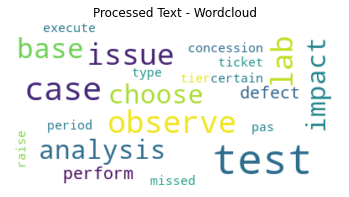

Counter({'test': 20,
         'case': 11,
         'choose': 7,
         'tier': 1,
         'concession': 1,
         'period': 1,
         'pas': 1,
         'base': 8,
         'impact': 7,
         'analysis': 7,
         'issue': 9,
         'observe': 10,
         'lab': 9,
         'perform': 2,
         'execute': 1,
         'defect': 2,
         'missed': 1,
         'raise': 1,
         'certain': 1,
         'ticket': 1,
         'type': 1})

In [75]:
ignore_words = []
wc = WordCloud(max_font_size=50, max_words=100, background_color="white", stopwords = ignore_words, collocations=False).generate_from_frequencies(word_could_dict)
plt.figure()
plt.title("Processed Text - Wordcloud")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
# print(sorted(word_could_dict, key=word_could_dict.get, reverse=True)[:5])
word_could_dict

# NLP Model for Textual Classification

Everytime a defect occurs, testers will record down the reasons why it was not identified testing and subsequently come up with the root cause for the defect.

Goal: The purpose of this model is to take in input (reasons for defects) from testers and generate the most appropriate root cause, be it a root cause observed before, or an entirely new root cause.

Stretch goal: Take in conversations data (in text) from testers and teams, and identify the reasons for defects among the noise. This could be done using TF-IDF, as well as weighting of important keywords from previous inputs/root causes.

### Train-test split attempt on given data

In [55]:
# X : reasons for defects
# Y : root causes

X = df['Processed Text']
Y = df['Primary Root Cause Classification #3']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, shuffle=True, stratify = Y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Some classes in the dataset has only 1 input data. This not only makes it difficult to split the data into training and testing, but also greatly reduces the accuracy/precision/recall of the prediction models.

### Testing Pseudo Data with classification model

In [4]:
pseudo_data = pd.read_excel("./data/pseudo_data.xlsx", sheet_name="Defect Data")
pseudo_df = pd.DataFrame(pseudo_data)
pseudo_df

,Test Lead,Why defect was not identified during testing?,Are related requirements recorded in the BR or UCS?,"If prior response is ""Yes"", list down the BR or UCS document number(s) and clause identifier(s)",Primary Root Cause Classification #3,Remark,Proposed solution to prevent recurrence
0,Esther Ong,"Test case wrongly tested for ""different tiers""...",Yes,L1081,Ambiguous Requirement [SA],NaN,NaN
1,Esther Ong,Test case worked but for the wrong requirement.,No,NaN,Ambiguous Requirement [SA],NaN,NaN
2,Phoon CF,Test case worked but was not for the intended ...,No,NaN,Ambiguous Requirement [SA],NaN,NaN
3,Jessie Chua,"Test case failed to implement ""normal fare"" re...",Yes,SYS,Ambiguous Requirement [SA],NaN,NaN
4,Phoon CF,Requirement given was tested but interpreted w...,No,NaN,Ambiguous Requirement [SA],NaN,NaN
...,...,...,...,...,...,...,...
240,Phoon CF,Did not test this issue due to time constraint.,No,NaN,Time Constraint,NaN,NaN
241,Jessie Chua,Not enough time to test this issue.,Yes,L1081,Time Constraint,NaN,NaN
242,Phoon CF,More time needed to test this issue.,Yes,L1081,Time Constraint,NaN,NaN
243,Esther Ong,Issue was not tested due to limited time.,Yes,BRUL,Time Constraint,NaN,NaN


In [18]:
pseudo_df['Processed Text'] = pseudo_df['Why defect was not identified during testing?'].apply(lambda x: processText(x))
pseudo_df

,Test Lead,Why defect was not identified during testing?,Are related requirements recorded in the BR or UCS?,"If prior response is ""Yes"", list down the BR or UCS document number(s) and clause identifier(s)",Primary Root Cause Classification #3,Remark,Proposed solution to prevent recurrence,Processed Text
0,Esther Ong,"Test case wrongly tested for ""different tiers""...",Yes,L1081,Ambiguous Requirement [SA],NaN,NaN,test case wrongly test different tier requirem...
1,Esther Ong,Test case worked but for the wrong requirement.,No,NaN,Ambiguous Requirement [SA],NaN,NaN,test case work wrong requirement
2,Phoon CF,Test case worked but was not for the intended ...,No,NaN,Ambiguous Requirement [SA],NaN,NaN,test case work intend requirement
3,Jessie Chua,"Test case failed to implement ""normal fare"" re...",Yes,SYS,Ambiguous Requirement [SA],NaN,NaN,test case fail implement normal fare requirement
4,Phoon CF,Requirement given was tested but interpreted w...,No,NaN,Ambiguous Requirement [SA],NaN,NaN,requirement give test interpreted wrongly
...,...,...,...,...,...,...,...,...
240,Phoon CF,Did not test this issue due to time constraint.,No,NaN,Time Constraint,NaN,NaN,test issue due time constraint
241,Jessie Chua,Not enough time to test this issue.,Yes,L1081,Time Constraint,NaN,NaN,enough time test issue
242,Phoon CF,More time needed to test this issue.,Yes,L1081,Time Constraint,NaN,NaN,time need test issue
243,Esther Ong,Issue was not tested due to limited time.,Yes,BRUL,Time Constraint,NaN,NaN,issue test due limited time


In [19]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(pseudo_df["Processed Text"], pseudo_df["Primary Root Cause Classification #3"], test_size=0.2, shuffle=True)

#Tf-Idf vectorization
tfidf_vectorizer = TfidfVectorizer(use_idf = True)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

#### Support Vector Classifier

In [20]:
#Parameter Tuning using Grid Search & Stratified K Fold Cross Validation for SVC
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':[0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1], 'degree': [1, 2, 3, 4]}
grid_svc = GridSearchCV(SVC(), parameters, refit=True, cv=10, verbose=3) #cv: number of folds in a StratifiedKFold cross validation
grid_svc.fit(X_train_tfidf, y_train)
print(grid_svc.best_estimator_)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
[CV 1/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.700 total time=   0.0s
[CV 2/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.650 total time=   0.0s
[CV 3/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.600 total time=   0.0s
[CV 4/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.700 total time=   0.0s
[CV 5/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.650 total time=   0.0s
[CV 6/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.650 total time=   0.0s
[CV 7/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.579 total time=   0.0s
[CV 8/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.474 total time=   0.0s
[CV 9/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.421 total time=   0.0s
[CV 10/10] END C=0.1, degree=1, gamma=0.001, kernel=linear;, score=0.684 total time=   0.0s
[CV 1/10] END C=0.1, deg

In [28]:
X_test_tfidf

<49x186 sparse matrix of type '<class 'numpy.float64'>'
	with 219 stored elements in Compressed Sparse Row format>

In [21]:
#Implement best model
param_dict = grid_svc.best_params_
svc = SVC(kernel=param_dict['kernel'], C=param_dict['C'], gamma=param_dict['gamma'], degree=param_dict['degree'], decision_function_shape='ovr') 
svc.fit(X_train_tfidf, y_train)
svc_y_pred = svc.predict(X_test_tfidf)

svc_cr = classification_report(y_test, svc_y_pred)
print(svc_cr)
svc_cr = classification_report(y_test, svc_y_pred, output_dict= True)

                                          precision    recall  f1-score   support

              Ambiguous Requirement [BR]       1.00      0.75      0.86         4
              Ambiguous Requirement [SA]       0.75      0.60      0.67         5
        Ambiguous Requirement [Software]       0.57      0.80      0.67         5
                Missing Requirement [BR]       1.00      1.00      1.00         5
                Missing Requirement [SA]       1.00      1.00      1.00         4
          Missing Requirement [Software]       1.00      1.00      1.00         3
                       Missing Test Case       1.00      1.00      1.00         4
                        Not Within Scope       1.00      1.00      1.00         3
Test & Production Environment Difference       1.00      1.00      1.00         6
  Test & Production Operation Difference       1.00      1.00      1.00         7
                         Time Constraint       1.00      1.00      1.00         3

              

#### Naive Bayes Classifier

In [61]:
#Parameter Tuning using Grid Search & Stratified K Fold Cross Validation for Naive Bayes
parameters = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5]} #smoothing parameter
grid_mnb = GridSearchCV(MultinomialNB(), parameters, refit=True, cv=10, verbose=3) #cv: number of folds in a StratifiedKFold cross validation
grid_mnb.fit(X_train_tfidf, y_train)
print(grid_mnb.best_estimator_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END .......................alpha=0.01;, score=0.950 total time=   0.0s
[CV 2/10] END .......................alpha=0.01;, score=0.900 total time=   0.0s
[CV 3/10] END .......................alpha=0.01;, score=0.900 total time=   0.0s
[CV 4/10] END .......................alpha=0.01;, score=0.950 total time=   0.0s
[CV 5/10] END .......................alpha=0.01;, score=0.900 total time=   0.0s
[CV 6/10] END .......................alpha=0.01;, score=0.950 total time=   0.0s
[CV 7/10] END .......................alpha=0.01;, score=0.895 total time=   0.0s
[CV 8/10] END .......................alpha=0.01;, score=1.000 total time=   0.0s
[CV 9/10] END .......................alpha=0.01;, score=0.895 total time=   0.0s
[CV 10/10] END ......................alpha=0.01;, score=0.842 total time=   0.0s
[CV 1/10] END ........................alpha=0.1;, score=0.900 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;

In [121]:
#Implement best model
param_dict = grid_mnb.best_params_
mnb = MultinomialNB(alpha=param_dict['alpha'])
mnb.fit(X_train_tfidf, y_train)
mnb_y_pred = mnb.predict(X_test_tfidf)

mnb_cr = classification_report(y_test, mnb_y_pred)
print(mnb_cr)
# for comparison later
mnb_cr = classification_report(y_test, mnb_y_pred, output_dict= True)

                                          precision    recall  f1-score   support

              Ambiguous Requirement [BR]       1.00      0.67      0.80         3
              Ambiguous Requirement [SA]       0.50      0.50      0.50         2
        Ambiguous Requirement [Software]       0.67      0.80      0.73         5
                Missing Requirement [BR]       1.00      1.00      1.00         8
                Missing Requirement [SA]       1.00      1.00      1.00         4
          Missing Requirement [Software]       1.00      1.00      1.00         2
                       Missing Test Case       1.00      1.00      1.00         3
                        Not Within Scope       1.00      1.00      1.00         4
Test & Production Environment Difference       1.00      1.00      1.00         3
  Test & Production Operation Difference       1.00      1.00      1.00         9
                         Time Constraint       1.00      1.00      1.00         6

              

#### Multinomial Logistic Regression

In [44]:
# # for stratified k-fold cross-validation
# X = pseudo_df["Processed Text"]
# Y = pseudo_df['Primary Root Cause Classification #3']
# tfidf_vectorizer = TfidfVectorizer(use_idf = True)
# X_tfidf = tfidf_vectorizer.fit_transform(X) 

In [85]:
#Parameter Tuning using Grid Search & Stratified K Fold Cross Validation for Logistic Regression
parameters = {'multi_class': ['multinomial'], 'solver': ['lbfgs'], 'C': [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0], 'penalty': ['l2']} #smoothing parameter
grid_mlr = GridSearchCV(LogisticRegression(), parameters, refit=True, cv=10, verbose=3) #cv: number of folds in a StratifiedKFold cross validation
grid_mlr.fit(X_train_tfidf, y_train)
print(grid_mlr.best_estimator_)

# # define the model evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate the model and collect the scores
# n_scores = cross_val_score(log_model, X_tfidf, Y, scoring='accuracy', cv=cv, n_jobs=-1)
# # report the model performance
# print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.0,

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1406, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.

[CV 3/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.100 total time=   0.1s
[CV 4/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.150 total time=   0.0s
[CV 5/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.150 total time=   0.0s
[CV 6/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.150 total time=   0.0s
[CV 7/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.0s
[CV 8/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.0s
[CV 9/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.1s
[CV 10/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.0s
[CV 1/10] END C=0.001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.100 total time=   0.0s
[CV 2/10] END C=0.001, multi_class=mu

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.11710526 0.11710526 0.11710526 0.67289474 0.87657895]
  warnings.warn(


In [124]:
#Implement best model
param_dict = grid_mlr.best_params_
mlr = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=param_dict['C'], penalty=param_dict['penalty'])
mlr.fit(X_train_tfidf, y_train)
mlr_y_pred = mlr.predict(X_test_tfidf)

mlr_cr = classification_report(y_test, mlr_y_pred)
print(mlr_cr)
mlr_cr = classification_report(y_test, mlr_y_pred, output_dict= True)

                                          precision    recall  f1-score   support

              Ambiguous Requirement [BR]       1.00      1.00      1.00         3
              Ambiguous Requirement [SA]       0.00      0.00      0.00         2
        Ambiguous Requirement [Software]       0.71      1.00      0.83         5
                Missing Requirement [BR]       1.00      1.00      1.00         8
                Missing Requirement [SA]       1.00      1.00      1.00         4
          Missing Requirement [Software]       1.00      1.00      1.00         2
                       Missing Test Case       1.00      1.00      1.00         3
                        Not Within Scope       1.00      1.00      1.00         4
Test & Production Environment Difference       1.00      1.00      1.00         3
  Test & Production Operation Difference       1.00      1.00      1.00         9
                         Time Constraint       1.00      1.00      1.00         6

              

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Use

<AxesSubplot:title={'center':'Multinomial Logistic Regression Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

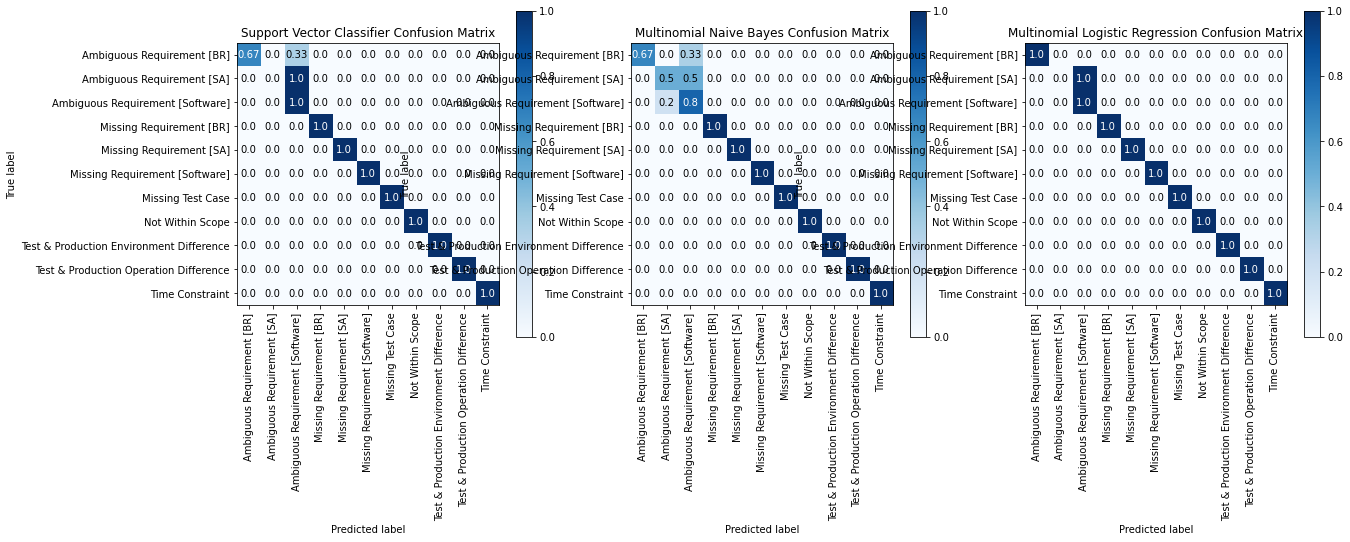

In [87]:
#Plot Confusion Matrix to compare results
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
skplt.metrics.plot_confusion_matrix(y_test, svc_y_pred, normalize=True, title="Support Vector Classifier Confusion Matrix", x_tick_rotation=90, ax=ax1)

ax2 = fig.add_subplot(132)
skplt.metrics.plot_confusion_matrix(y_test, mnb_y_pred, normalize=True, title="Multinomial Naive Bayes Confusion Matrix", x_tick_rotation=90, ax=ax2)

ax3 = fig.add_subplot(133)
skplt.metrics.plot_confusion_matrix(y_test, mlr_y_pred, normalize=True, title="Multinomial Logistic Regression Confusion Matrix", x_tick_rotation=90, ax=ax3)



### Comparison between models

To evaluate which model is optimal, we will be comparing based on the weighted average scores, which takes into account the number of samples in each class. This is important as previous analysis has shown that the size of each classes are extremly skewed, with 1 class having 8 data points while 3 classes have only 1 data point each.

In [131]:
all_values = [list(svc_cr['weighted avg'].values()), list(mnb_cr['weighted avg'].values()), list(mlr_cr['weighted avg'].values())]
temp = pd.DataFrame(all_values, index = ["SVC", "Multinomial Naive Bayes", "Multiomial Logistic Regression"], columns = list(mlr_cr['weighted avg'].keys()))
temp

,precision,recall,f1-score,support
SVC,0.920918,0.938776,0.923391,49
Multinomial Naive Bayes,0.945578,0.938776,0.939518,49
Multiomial Logistic Regression,0.930029,0.959184,0.942177,49


# Testing models on augmented text

In [47]:
base_data = pd.read_excel("./data/pseudo_data.xlsx", sheet_name="Base Data")
base_df = pd.DataFrame(base_data)
base_df

,Classification #3,Why defect was not identified during testing
0,Ambiguous Requirement [SA],Requirement given was tested but interpreted w...
1,Ambiguous Requirement [BR],Business requirement given was open to interpr...
2,Ambiguous Requirement [Software],Test case failed to account for software updates.
3,Missing Requirement [SA],This requirement was not given by the design t...
4,Missing Requirement [BR],This requirement was not specified in the busi...
5,Missing Requirement [Software],This software requirement was not included.
6,Missing Test Case,Test case not performed.
7,Not Within Scope,This is outside the scope of the project.
8,Test & Production Environment Difference,Test case was not chosen based on the impact a...
9,Test & Production Operation Difference,This issue is specific to production operations.


In [48]:
list_of_list = base_df.values
text_dict = {}
for l in list_of_list:
    text_dict[l[0]] = l[1]

augmented_dict = {}
augmented_dict['Classification #3'] = []
augmented_dict['Why defect was not identified during testing'] = []

#Augment text using synonym of words 
for k,v in text_dict.items():
    syn_aug = naw.SynonymAug(aug_src='wordnet', aug_min=1, aug_max=3, stopwords=stopwords.words('english'))
    syn_aug_text = syn_aug.augment(v, n=10) 
    for sent in syn_aug_text:
        augmented_dict['Classification #3'].append(k)
        augmented_dict['Why defect was not identified during testing'].append(sent)

augmented_df = pd.DataFrame(augmented_dict)
augmented_df

,Classification #3,Why defect was not identified during testing
0,Ambiguous Requirement [SA],Demand hold was try but interpreted wrongly.
1,Ambiguous Requirement [SA],Necessary given was quiz but translate wrongly.
2,Ambiguous Requirement [SA],Demand given was test but interpreted wrong.
3,Ambiguous Requirement [SA],Requirement reach was tested but interpret inc...
4,Ambiguous Requirement [SA],Essential give was tested but interpreted wrong.
...,...,...
105,Time Constraint,Issue was not examine due to clock time restra...
106,Time Constraint,Issue was not test due to meter restraint.
107,Time Constraint,Issue was not screen ascribable to time restra...
108,Time Constraint,Issue was not test due to prison term restraint.


In [49]:
augmented_df['Augmented Text'] = augmented_df['Why defect was not identified during testing'].apply(lambda x: processText(x))
augmented_df

,Classification #3,Why defect was not identified during testing,Augmented Text
0,Ambiguous Requirement [SA],Demand hold was try but interpreted wrongly.,demand hold try interpret wrongly
1,Ambiguous Requirement [SA],Necessary given was quiz but translate wrongly.,necessary give quiz translate wrongly
2,Ambiguous Requirement [SA],Demand given was test but interpreted wrong.,demand give test interpret wrong
3,Ambiguous Requirement [SA],Requirement reach was tested but interpret inc...,requirement reach test interpret incorrectly
4,Ambiguous Requirement [SA],Essential give was tested but interpreted wrong.,essential give test interpret wrong
...,...,...,...
105,Time Constraint,Issue was not examine due to clock time restra...,issue examine due clock time restraint
106,Time Constraint,Issue was not test due to meter restraint.,issue test due meter restraint
107,Time Constraint,Issue was not screen ascribable to time restra...,issue screen ascribable time restraint
108,Time Constraint,Issue was not test due to prison term restraint.,issue test due prison term restraint


In [51]:
#Train-Test Split
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(augmented_df["Augmented Text"], augmented_df["Classification #3"], test_size=0.2, shuffle=True)

#Tf-Idf vectorization
tfidf_vectorizer = TfidfVectorizer(use_idf = True)
X_train_tfidf_aug = tfidf_vectorizer.fit_transform(X_train_aug) 
X_test_tfidf_aug = tfidf_vectorizer.transform(X_test_aug)

In [52]:
#Parameter Tuning using Grid Search & Stratified K Fold Cross Validation for SVC
parameters = {'kernel':('linear', 'poly', 'rbf'), 'C':[0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1], 'degree': [1, 2, 3, 4]}
grid_svc_aug = GridSearchCV(SVC(), parameters, refit=True, cv=10, verbose=0) #cv: number of folds in a StratifiedKFold cross validation
grid_svc_aug.fit(X_train_tfidf_aug, y_train_aug)

#Implement best model
param_dict = grid_svc_aug.best_params_
svc_aug = SVC(kernel=param_dict['kernel'], C=param_dict['C'], gamma=param_dict['gamma'], degree=param_dict['degree'], decision_function_shape='ovr') 
svc_aug.fit(X_train_tfidf_aug, y_train_aug)
svc_y_pred_aug = svc_aug.predict(X_test_tfidf_aug)

svc_cr_aug = classification_report(y_test_aug, svc_y_pred_aug)
print(svc_cr_aug)

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


                                          precision    recall  f1-score   support

              Ambiguous Requirement [BR]       1.00      1.00      1.00         1
              Ambiguous Requirement [SA]       1.00      1.00      1.00         2
        Ambiguous Requirement [Software]       1.00      1.00      1.00         4
                Missing Requirement [BR]       1.00      1.00      1.00         2
                Missing Requirement [SA]       1.00      1.00      1.00         1
          Missing Requirement [Software]       1.00      1.00      1.00         4
                        Not Within Scope       1.00      1.00      1.00         2
Test & Production Environment Difference       1.00      1.00      1.00         3
  Test & Production Operation Difference       1.00      1.00      1.00         2
                         Time Constraint       1.00      1.00      1.00         1

                                accuracy                           1.00        22
              

In [54]:
#Parameter Tuning using Grid Search & Stratified K Fold Cross Validation for Naive Bayes
parameters = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5]} #smoothing parameter
grid_mnb_aug = GridSearchCV(MultinomialNB(), parameters, refit=True, cv=10, verbose=0) #cv: number of folds in a StratifiedKFold cross validation
grid_mnb_aug.fit(X_train_tfidf_aug, y_train_aug)

#Implement best model
param_dict = grid_mnb_aug.best_params_
mnb_aug = MultinomialNB(alpha=param_dict['alpha'])
mnb_aug.fit(X_train_tfidf_aug, y_train_aug)
mnb_y_pred_aug = mnb_aug.predict(X_test_tfidf_aug)

mnb_cr_aug = classification_report(y_test_aug, mnb_y_pred_aug)
print(mnb_cr_aug)

                                          precision    recall  f1-score   support

              Ambiguous Requirement [BR]       1.00      1.00      1.00         1
              Ambiguous Requirement [SA]       1.00      1.00      1.00         2
        Ambiguous Requirement [Software]       1.00      1.00      1.00         4
                Missing Requirement [BR]       1.00      1.00      1.00         2
                Missing Requirement [SA]       1.00      1.00      1.00         1
          Missing Requirement [Software]       1.00      1.00      1.00         4
                        Not Within Scope       1.00      1.00      1.00         2
Test & Production Environment Difference       1.00      1.00      1.00         3
  Test & Production Operation Difference       1.00      1.00      1.00         2
                         Time Constraint       1.00      1.00      1.00         1

                                accuracy                           1.00        22
              

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [88]:
#Parameter Tuning using Grid Search & Stratified K Fold Cross Validation for Naive Bayes
parameters = {'multi_class': ['multinomial'], 'solver': ['lbfgs'], 'C': [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0], 'penalty': ['l2']} #smoothing parameter
grid_mlr_aug = GridSearchCV(LogisticRegression(), parameters, refit=True, cv=10, verbose=3) #cv: number of folds in a StratifiedKFold cross validation
grid_mlr_aug.fit(X_train_tfidf, y_train)
print(grid_mlr_aug.best_estimator_)

#Implement best model
param_dict = grid_mlr_aug.best_params_
mlr_aug = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=param_dict['C'], penalty=param_dict['penalty'])
mlr_aug.fit(X_train_tfidf, y_train)
mlr_y_pred_aug = mlr.predict(X_test_tfidf)

mlr_cr_aug = classification_report(y_test, mlr_y_pred_aug)
print(mlr_cr_aug)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 6/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 7/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 8/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 9/10] END C=0.0, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=nan total time=   0.0s
[CV 10/10] END C=0.0,

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1406, in fit
    fold_coefs_ = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/jiamingchu/opt/anaconda3/lib/python3.

[CV 7/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.0s
[CV 8/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.0s
[CV 9/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.0s
[CV 10/10] END C=0.0001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.105 total time=   0.0s
[CV 1/10] END C=0.001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.100 total time=   0.0s
[CV 2/10] END C=0.001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.100 total time=   0.0s
[CV 3/10] END C=0.001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.100 total time=   0.0s
[CV 4/10] END C=0.001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.150 total time=   0.0s
[CV 5/10] END C=0.001, multi_class=multinomial, penalty=l2, solver=lbfgs;, score=0.150 total time=   0.0s
[CV 6/10] END C=0.001, multi_class=multin

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.11710526 0.11710526 0.11710526 0.67289474 0.87657895]
  warnings.warn(
/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification

ValueError: Found input variables with inconsistent numbers of samples: [22, 49]

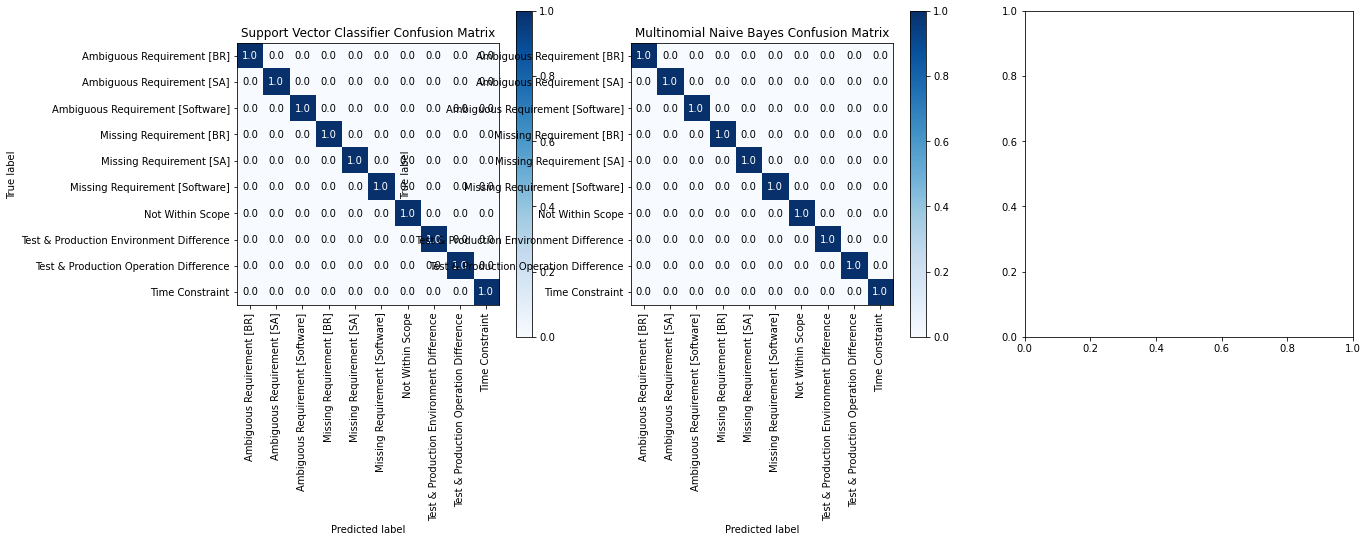

In [89]:
#Plot Confusion Matrix to compare results
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
skplt.metrics.plot_confusion_matrix(y_test_aug, svc_y_pred_aug, normalize=True, title="Support Vector Classifier Confusion Matrix", x_tick_rotation=90, ax=ax1)

ax2 = fig.add_subplot(132)
skplt.metrics.plot_confusion_matrix(y_test_aug, mnb_y_pred_aug, normalize=True, title="Multinomial Naive Bayes Confusion Matrix", x_tick_rotation=90, ax=ax2)

ax3 = fig.add_subplot(133)
skplt.metrics.plot_confusion_matrix(y_test_aug, mlr_y_pred_aug, normalize=True, title="Multinomial Logistic Regression Confusion Matrix", x_tick_rotation=90, ax=ax3)

In [56]:

multi_log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
multi_log_model.fit(X_train_tfidf_aug, y_train_aug)

#Implement best model
#param_dict = multi_log_model.best_params_
#svc_aug = SVC(kernel=param_dict['kernel'], C=param_dict['C'], gamma=param_dict['gamma'], degree=param_dict['degree'], decision_function_shape='ovr') 
multi_log_model.fit(X_train_tfidf_aug, y_train_aug)
svc_y_pred_aug = multi_log_model.predict(X_test_tfidf_aug)

svc_cr_aug = classification_report(y_test_aug, svc_y_pred_aug)
print(svc_cr_aug)

                                          precision    recall  f1-score   support

              Ambiguous Requirement [BR]       1.00      1.00      1.00         1
              Ambiguous Requirement [SA]       1.00      1.00      1.00         2
        Ambiguous Requirement [Software]       1.00      1.00      1.00         4
                Missing Requirement [BR]       1.00      1.00      1.00         2
                Missing Requirement [SA]       1.00      1.00      1.00         1
          Missing Requirement [Software]       1.00      1.00      1.00         4
                        Not Within Scope       1.00      1.00      1.00         2
Test & Production Environment Difference       1.00      1.00      1.00         3
  Test & Production Operation Difference       1.00      1.00      1.00         2
                         Time Constraint       1.00      1.00      1.00         1

                                accuracy                           1.00        22
              

/Users/jiamingchu/opt/anaconda3/lib/python3.9/site-packages/scikitplot/metrics.py:156: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(mappable=image)


<AxesSubplot:title={'center':'Multinomial Naive Bayes Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

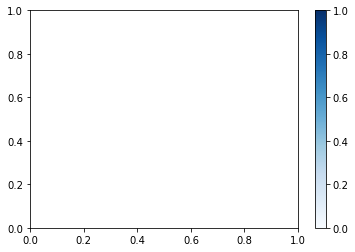

In [57]:
ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(y_test_aug, mnb_y_pred_aug, normalize=True, title="Multinomial Naive Bayes Confusion Matrix", x_tick_rotation=90, ax=ax2)

# Analysis on Root Causes